In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%pwd

'/content'

In [ ]:
cd gdrive/MyDrive/Cifar\ 100

/content/gdrive/MyDrive/Cifar 100


In [ ]:
%pwd

'/content/gdrive/MyDrive/Cifar 100'

In [ ]:
# from google.colab import files
# files.upload()  #this will prompt you to upload the kaggle.json

In [ ]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission

In [ ]:
# !kaggle datasets download -d nidbhavsar/text-vs-nontext

In [ ]:
import os
os.listdir()

['kaggle.json',
 'text-vs-nontext.zip',
 'text_vs_non-text',
 '.ipynb_checkpoints',
 'yes_theory',
 'form_vs_non_form']

In [ ]:
# !unzip \*.zip  && rm *.zip+-

In [ ]:
print(len(os.listdir('text_vs_non-text/form_text_dataset/')))

1499


In [ ]:
print(len(os.listdir('text_vs_non-text/form_non-text_dataset/')))

1499


In [ ]:
# png_files = os.listdir('text_vs_non-text/form_text_dataset/')
# jpg_files = os.listdir('text_vs_non-text/form_non-text_dataset/')
# print(len(png_files), len(jpg_files))

In [ ]:
# names = []
# for i in jpg_files:
#   i_ =  i.split('.')
#   names.append(i_[0])
# print(names)

In [ ]:
# os.mkdir('text_vs_non-text/form_non-text_dataset_/')

In [ ]:
# # convert all jpg to png
# path = 'text_vs_non-text/form_non-text_dataset/'
# dest = 'text_vs_non-text/form_non-text_dataset_/'
# target = '.jpg'
# from PIL import Image
# for idx, img in enumerate(jpg_files):
#   loc = path + img
#   im = Image.open(loc)
#   dest_ = dest+names[idx]+'.png'
#   if names[idx] == '1005':
#     continue
#   im.save(dest_, 'png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
data_dir = pathlib.Path('text_vs_non-text/')

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2998


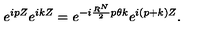

In [ ]:
# Displaying images of class 1
form = list(data_dir.glob('form_text_dataset/*'))
PIL.Image.open(str(form[0]))

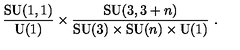

In [ ]:
PIL.Image.open(str(form[1]))

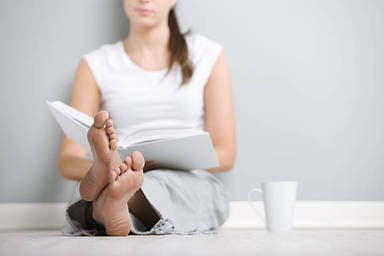

In [ ]:
# Displaying images of class 0
non_form = list(data_dir.glob('form_non-text_dataset/*'))
PIL.Image.open(str(non_form[0]))

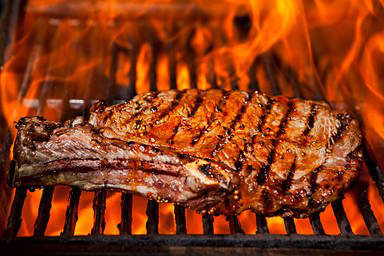

In [ ]:
PIL.Image.open(str(non_form[1]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2998 files belonging to 2 classes.
Using 2399 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2998 files belonging to 2 classes.
Using 599 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['form_non-text_dataset', 'form_text_dataset']


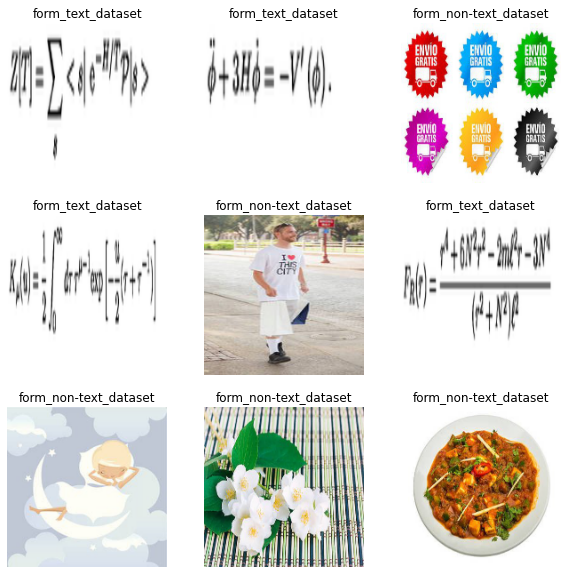

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch)
  break

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
75/75 [==============================] - 136s 1s/step - loss: 0.5032 - accuracy: 0.7960 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 2/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0363 - accuracy: 0.9898 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 3/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0225 - val_accuracy: 0.9917
Epoch 4/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0096 - val_accuracy: 0.9967
Epoch 5/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0264 - accuracy: 0.9955 - val_loss: 0.0247 - val_accuracy: 0.9917
Epoch 6/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0106 - accuracy: 0.9956 - val_loss: 0.0103 - val_accuracy: 0.9967
Epoch 7/10
75/75 [==============================] - 1s 19ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.0053 - val_accuracy: 0.9983
Epoch 8/10
75

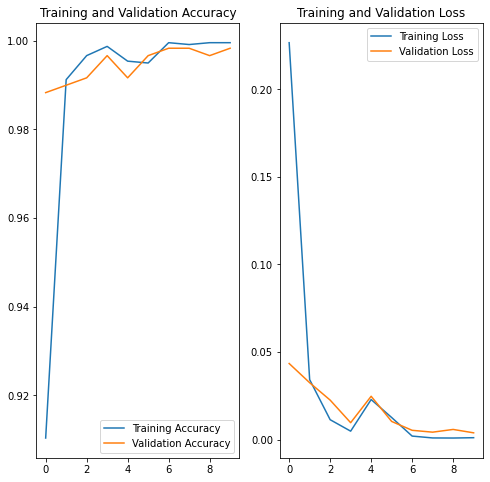

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
print(os.listdir())

['kaggle.json', 'text-vs-nontext.zip', 'text_vs_non-text', '73912.png', '.ipynb_checkpoints', 'yes theory']


In [ ]:
# import cv2
# img = cv2.imread('73912.png')
# plt.imshow(img)
# plt.show()

In [ ]:
pred_imgfiles = os.listdir('yes_theory/')
print(pred_imgfiles)
print(len(pred_imgfiles))

['73912.png', '3.png', '2.png', '1.png', '37.png', '36.png', '26.png']
7


In [ ]:
img_dir = 'yes_theory/'
for i in pred_imgfiles:
  print(img_dir + i)
  img = tf.io.read_file(img_dir + i)
  img = tf.image.decode_png(img,channels=3)
  img.set_shape([None,None,3])
  img = tf.image.resize(img,(180, 180))
  img = np.expand_dims(img, 0)
  print(img.shape)
  pred = model.predict(img)
  print(np.argmax(pred))

yes_theory/73912.png
(1, 180, 180, 3)
1
yes_theory/3.png
(1, 180, 180, 3)
0
yes_theory/2.png
(1, 180, 180, 3)
0
yes_theory/1.png
(1, 180, 180, 3)
0
yes_theory/37.png
(1, 180, 180, 3)
1
yes_theory/36.png
(1, 180, 180, 3)
1
yes_theory/26.png
(1, 180, 180, 3)
1


In [ ]:
%pwd

'/content/gdrive/My Drive/Cifar 100'

In [ ]:
model.save('form_vs_non_form')

INFO:tensorflow:Assets written to: form_vs_non_form/assets


## Predict model 

In [ ]:
# need to run this while predicting with fresh model!
# also cd uptil yes_theory dir.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
%cd gdrive/MyDrive/Cifar\ 100

/content/gdrive/MyDrive/Cifar 100


In [ ]:
yes_model = keras.models.load_model('form_vs_non_form')

In [ ]:
yes_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
import os
pred_imgfiles = os.listdir('yes_theory/')
print(pred_imgfiles)
print(len(pred_imgfiles))

['26.png', '36.png', '37.png', '73912.png', '1.png', '2.png', '3.png']
7


In [ ]:
img_dir = 'yes_theory/'
for i in pred_imgfiles:
  print(img_dir + i)
  img = tf.io.read_file(img_dir + i)
  img = tf.image.decode_png(img,channels=3)
  img.set_shape([None,None,3])
  img = tf.image.resize(img,(180, 180))
  img = np.expand_dims(img, 0)
  print(img.shape)
  pred = yes_model.predict(img)
  print(np.argmax(pred))

yes_theory/26.png
(1, 180, 180, 3)
1
yes_theory/36.png
(1, 180, 180, 3)
1
yes_theory/37.png
(1, 180, 180, 3)
1
yes_theory/73912.png
(1, 180, 180, 3)
1
yes_theory/1.png
(1, 180, 180, 3)
0
yes_theory/2.png
(1, 180, 180, 3)
0
yes_theory/3.png
(1, 180, 180, 3)
0
